In [1]:
import os
import pandas as pd
import sys

sys.path.append("..")
from pathlib import Path

notebook_path = Path().resolve()
current_dir = notebook_path.parent
report_path = os.path.join(current_dir, "report")

reporting_data_path = os.path.join(report_path, "data")


In [2]:
""" Descriptive analysis  """
"""
NOTES
- Stats and Correlations generated by reports/desc_analysis.py
- Results combined in Correlaitons.csv (drive) 
"""
reporting_results_path = os.path.join(report_path, "results")

voltur_stats_file = os.path.join(reporting_results_path, "voltur_wind_stats.csv")
## file for per-window correlation values 
voltur_corr_file =  os.path.join(reporting_results_path, "voltur_correlations.csv") 

In [3]:
from report.utils.comparison_analysis import compare_all_metrics, compare_experiments
#sentiment_pair_metrics
sentiment_metrics = os.path.join(reporting_data_path, "performance_metrics.csv")
sentiment_metrics_df = pd.read_csv(sentiment_metrics)

windows = sentiment_metrics_df["window"].values
metrics_dict = {
    "annualized_sharpe": (sentiment_metrics_df["Exp.3a-annualized_sharpe"], sentiment_metrics_df["Exp.3b-annualized_sharpe"]),
    "annualized_volatility": (sentiment_metrics_df["Exp.3a-annualized_volatility"], sentiment_metrics_df["Exp.3b-annualized_volatility"]),
    "annualized_sortino": (sentiment_metrics_df["Exp.3a-annualized_sortino"], sentiment_metrics_df["Exp.3b-annualized_sortino"]),
    "max_drawdown": (sentiment_metrics_df["Exp.3a-max_drawdown"], sentiment_metrics_df["Exp.3b-max_drawdown"]),
    "total_return-annualized": (sentiment_metrics_df["Exp.3a-total_return-annualized"], sentiment_metrics_df["Exp.3b-total_return-annualized"])
}
# Run all comparisons
summary_df = compare_all_metrics(metrics_dict, windows=windows, experiment_name="Fear & Greed Normalised vs Mapped", save_csv=False, save_plots=True)

print(summary_df)


                    metric  mean_diff  median_diff  positive_windows  \
0        annualized_sharpe   0.171914    -0.007038                10   
1    annualized_volatility  -0.019402    -0.009174                 8   
2       annualized_sortino   0.329455     0.050519                11   
3             max_drawdown  -0.017256    -0.012620                 8   
4  total_return-annualized  -0.246536    -0.003750                10   

   negative_windows    t_stat   p_value  
0                12  0.819632  0.421631  
1                14 -0.811188  0.426356  
2                11  0.953908  0.350983  
3                14 -1.477242  0.154452  
4                12 -0.748973  0.462181  


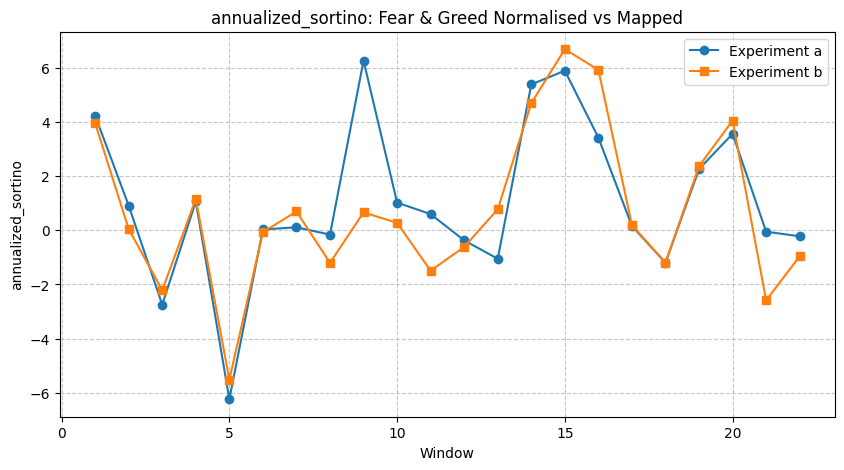

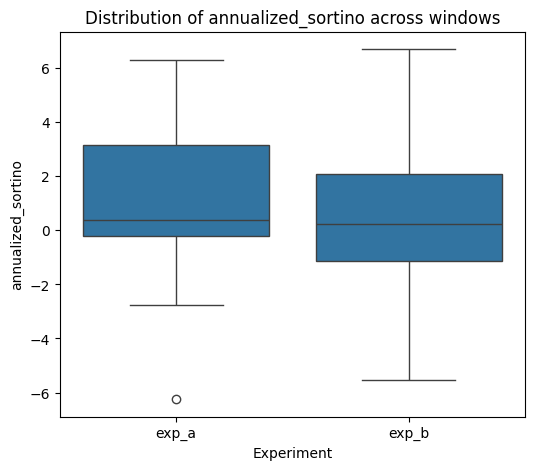

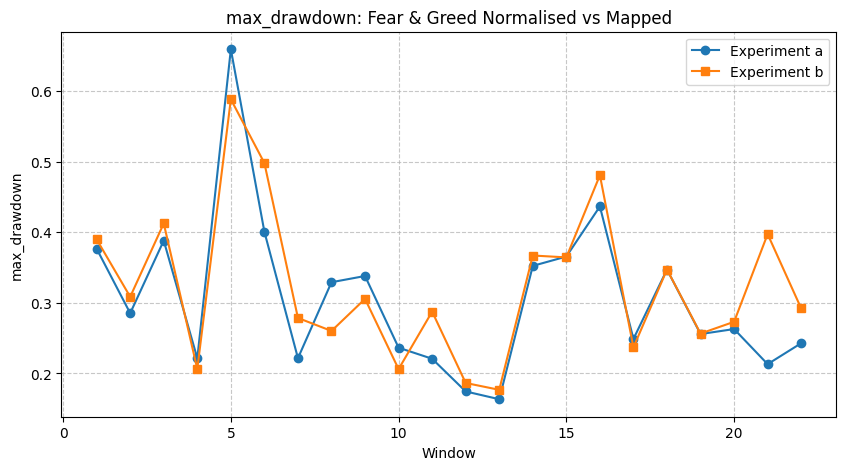

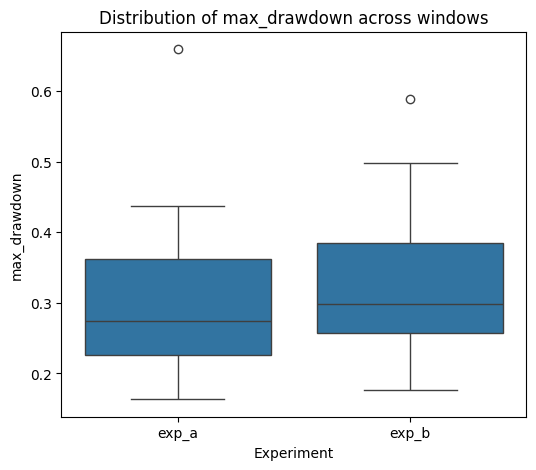

{'metric': 'max_drawdown',
 'mean_diff': np.float64(-0.017255614300000006),
 'median_diff': np.float64(-0.012620091799999997),
 'positive_windows': 8,
 'negative_windows': 14,
 't_stat': np.float64(-1.4772417182168152),
 'p_value': np.float64(0.15445174978587745)}

In [4]:
from report.utils.comparison_analysis import compare_experiments

sortino3a = sentiment_metrics_df["Exp.3a-annualized_sortino"]
sortino3b = sentiment_metrics_df["Exp.3b-annualized_sortino"]

compare_experiments(expA=sortino3a, expB=sortino3b, metric_name="annualized_sortino", experiment_name="Fear & Greed Normalised vs Mapped", windows=None, save_plots=False ) 

maxd3a = sentiment_metrics_df["Exp.3a-max_drawdown"]
maxd3b = sentiment_metrics_df["Exp.3b-max_drawdown"]
compare_experiments(expA=maxd3a, expB=maxd3b, metric_name="max_drawdown", experiment_name="Fear & Greed Normalised vs Mapped", windows=None, save_plots=False ) 


In [11]:
""" Phase 3 correlations """

## files for per-window correlation values 
sen_corr_file_a =  os.path.join(reporting_results_path, "normalized_sen_correlations.csv") 
sen_corr_file_b =  os.path.join(reporting_results_path, "mapped_sen_correlations.csv") 

sen_a_corr_df = pd.read_csv(sen_corr_file_a)
sen_b_corr_df = pd.read_csv(sen_corr_file_b)

sen_a_corr_summary = sen_a_corr_df.groupby("pair")["value"].agg(mean="mean", min="min", max="max", std="std", n="count").reset_index()

print("Phase-3a Correlations - Fear & Greed (normalized)")
print(sen_a_corr_summary)

sen_b_corr_summary = sen_b_corr_df.groupby("pair")["value"].agg(mean="mean", min="min", max="max", std="std", n="count").reset_index()
print("==========================================")
print("Phase-3b Correlations - Fear & Greed (mapped)")
print(sen_b_corr_summary)

Phase-3a Correlations - Fear & Greed (normalized)
                             pair      mean       min       max       std   n
0       daily_return ~ fear_greed -0.061398 -0.171000  0.162529  0.075240  22
1  daily_return ~ fear_greed_norm -0.061754 -0.172003  0.163415  0.075578  22
Phase-3b Correlations - Fear & Greed (mapped)
                               pair      mean       min       max       std  \
0  daily_return ~ fear_greed_mapped -0.087138 -0.260378  0.033544  0.070583   

    n  
0  22  


In [12]:
""" Phase-2 Correlations """
voltur_corr_df = pd.read_csv(voltur_corr_file)

voltur_corr_summary = voltur_corr_df.groupby("pair")["value"].agg(
    mean="mean",
    min="min",
    max="max",
    std="std",
    n="count"
).reset_index()

print("Phase-2 Correlations for Turbulence & Volatility")
print(voltur_corr_summary)


Phase-2 Correlations for Turbulence & Volatility
                        pair      mean       min       max       std   n
0  daily_return ~ turbulence  0.143118 -0.419556  0.552887  0.234835  22
1  daily_return ~ volatility -0.003658 -0.212924  0.301539  0.106099  22
2    turbulence ~ volatility  0.116309 -0.063683  0.330444  0.114913  22


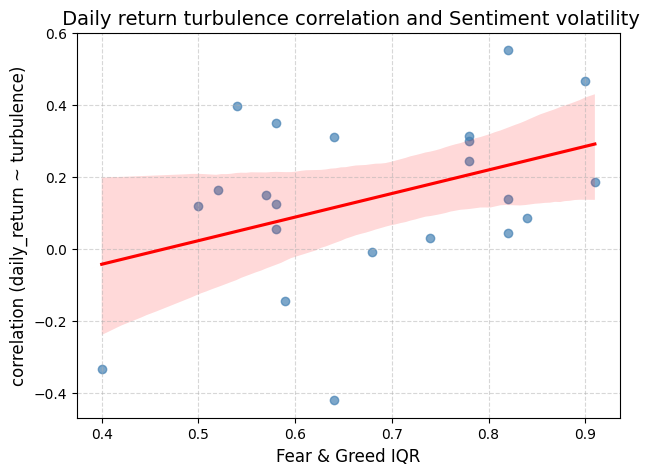

In [4]:
""" SCATTER PLOT """
# DAILY RETURN TURBULENCE CORRELATION* and SENTIMENT VOLATILITY 
# *voltur_corr_file and fear&greed IQR data

from report.utils.graphic_helpers import correlation_scatter

correlations_file = os.path.join(reporting_data_path, "turbulence_and_sentiment.csv")
correlations_df = pd.read_csv(correlations_file)

# column names:
# window	Correlations (daily_return ~ turbulence)	FG_Mean	FG_Volatility	FG_IQR

fg_IQR_X = correlations_df["FG-IQR"]
turb_Y = correlations_df["Turb-correlations"]

correlation_scatter(fg_IQR_X, turb_Y, "Fear & Greed IQR", "correlation (daily_return ~ turbulence)", " Daily return turbulence correlation and Sentiment volatility")

In [16]:
""" Correlations result with regressions """
# correlations_df / turbulence_and_sentiment.csv column names:
# window	Correlations (daily_return ~ turbulence)	FG_Mean	FG_Volatility	FG_IQR
from report.utils.regressions_common import run_simple_regression, run_multiple_regression, regression_summary_table

correlations_file = os.path.join(reporting_data_path, "turbulence_and_sentiment.csv")
correlations_df = pd.read_csv(correlations_file)

# Bivariate regression with window level values- Turb-correlations	and
# fear & greed (individually) mean (model1) , std(model2) and IQR data (model3)

# Regression: Turbulence correlations and Fear & Greed 
model1 = run_simple_regression(correlations_df, "Turb-correlations", "FG-Mean")
summary1 = regression_summary_table(model1, model_name="Turb. correlations - Fear&Greed (Mean)")

model2 = run_simple_regression(correlations_df, "Turb-correlations", "FG-Volatility")
summary2 = regression_summary_table(model2, model_name="Turb. correlations  - Fear&Greed (Std)")

model3 = run_simple_regression(correlations_df, "Turb-correlations", "FG-IQR")
summary3 = regression_summary_table(model3, model_name="Turb. correlations - Fear&Greed (IQR)")

all_summaries = pd.concat([summary1, summary2], ignore_index=True)
# Display 
import IPython.display as display
display.display(summary1)
display.display(summary2)
display.display(summary3)

# full results
# display.display(model1.summary())
# display.display(model2.summary())
# display.display(model3.summary())



,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Turb. correlations - Fear&Greed (Mean),Intercept,0.1927,0.0644,2.99,0.0028,0.0665,0.3188
1,Turb. correlations - Fear&Greed (Mean),Q('FG-Mean'),0.3861,0.4511,0.86,0.392,-0.498,1.2702
2,Turb. correlations - Fear&Greed (Mean),R-squared,0.0500,,,,,
3,Turb. correlations - Fear&Greed (Mean),Adj. R-squared,0.0030,,,,,


,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Turb. correlations - Fear&Greed (Std),Intercept,0.5559,1.2947,0.43,0.6677,-1.9816,3.0934
1,Turb. correlations - Fear&Greed (Std),Q('FG-Volatility'),-1.0180,3.2445,-0.31,0.7537,-7.3772,5.3412
2,Turb. correlations - Fear&Greed (Std),R-squared,0.0090,,,,,
3,Turb. correlations - Fear&Greed (Std),Adj. R-squared,-0.0400,,,,,


,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Turb. correlations - Fear&Greed (IQR),Intercept,-0.3038,0.2701,-1.12,0.2607,-0.8332,0.2256
1,Turb. correlations - Fear&Greed (IQR),Q('FG-IQR'),0.6550,0.3684,1.78,0.0754,-0.0671,1.3771
2,Turb. correlations - Fear&Greed (IQR),R-squared,0.1590,,,,,
3,Turb. correlations - Fear&Greed (IQR),Adj. R-squared,0.1170,,,,,


In [3]:
""" REGRESSION COMMON  """

from report.utils.regressions_common import run_simple_regression, run_multiple_regression, regression_summary_table
import IPython.display as display


In [13]:
""" PHASE 1 - Control group """
# agent,Window,Sharpe_ann,Sortino_ann,Volatility_ann,Max_Drawdown,Total_Return_ann,Turbulence_ann, FG_norm_Std	
perf_metrics_ctrl = os.path.join(reporting_data_path, "phase-1_reg.csv")
ctrl_performance_df = pd.read_csv(perf_metrics_ctrl)

"""    Temp note : avoid adding to many ind-vars : overfitting or multicollinearity """ 

simp_reg_phase1_vol = run_simple_regression(ctrl_performance_df, "Sharpe_ann", "Volatility_ann")
simp_reg_phase1_fg = run_simple_regression(ctrl_performance_df, "Sharpe_ann", "FG_norm_Std")

# Full result
# display.display(simp_reg_phase1_vol.summary())
# display.display(simp_reg_phase1_fg.summary())

summary_phase1_vol = regression_summary_table(simp_reg_phase1_vol)
summary_phase1_fg = regression_summary_table(simp_reg_phase1_fg)

display.display(summary_phase1_vol)
display.display(summary_phase1_fg)


,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Model,Intercept,3.9573,2.2631,1.75,0.0804,-0.4782,8.3928
1,Model,Q('Volatility_ann'),-5.8344,3.8219,-1.53,0.1269,-13.3251,1.6564
2,Model,R-squared,0.1830,,,,,
3,Model,Adj. R-squared,0.1420,,,,,


,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Model,Intercept,-0.4767,1.4211,-0.34,0.7373,-3.2621,2.3087
1,Model,Q('FG_norm_Std'),3.9971,5.2925,0.76,0.4501,-6.376,14.3701
2,Model,R-squared,0.0260,,,,,
3,Model,Adj. R-squared,-0.0220,,,,,


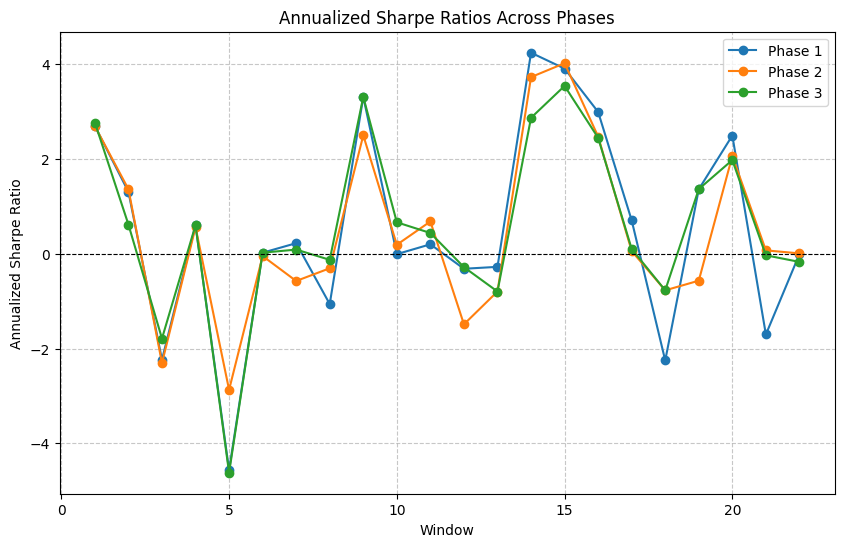

In [2]:
""" PHASE 1-3 - Time Series plot """
from report.utils.graphic_helpers import plot_sharpe_across_phases
#columns : window	date range	phase sharp_ann

perf_metrics = os.path.join(reporting_data_path, "performance_metrics_flat.csv")
performance_df = pd.read_csv(perf_metrics)

plot_sharpe_across_phases(performance_df)



In [7]:
""" Compare Sharp accros Phases """

from report.utils.graphic_helpers import summarize_sharpe_differences
perf_metrics = os.path.join(reporting_data_path, "performance_metrics_flat.csv")
performance_df = pd.read_csv(perf_metrics)

summary_df = summarize_sharpe_differences(performance_df)
# print(summary_df.to_csv(index=False))
# # to view here use:
print(summary_df.to_string(index=False))

 window  best_phase  worst_phase  best_sharpe best_category  worst_sharpe worst_category     diff          comparison
      1           3            2     2.770902     very good      2.692746      very good 0.078156             similar
      2           2            3     1.363441          good      0.617267     suboptimal 0.746174    large difference
      3           3            2    -1.789555      negative     -2.308020       negative 0.518465    large difference
      4           1            2     0.606049    suboptimal      0.561565     suboptimal 0.044484             similar
      5           2            3    -2.871837      negative     -4.622236       negative 1.750399    large difference
      6           1            2     0.022930    suboptimal     -0.047239       negative 0.070169             similar
      7           1            2     0.223873    suboptimal     -0.574455       negative 0.798328    large difference
      8           3            1    -0.127354      negat

In [7]:
""" PHASE 2 - Volatility_30 & Turbulence_60 trained agent """

# ft_performance_df column names:
# agent,Window,Sharpe_ann,Sortino_ann,Volatility_ann,Max_Drawdown,Total_Return_ann,Turbulence_ann


phase2_datafile = os.path.join(reporting_data_path, "phase-2_reg.csv")
ft_performance_df = pd.read_csv(phase2_datafile)

""" multiple regression """
dependent2_var = "Sharpe_ann"
# removed agent
independent2_vars = ["Volatility_ann", "Turbulence_ann"]
reg_phase2= run_multiple_regression(ft_performance_df,  dependent2_var, independent2_vars)
summary_phase2 = regression_summary_table(reg_phase2)

display.display(reg_phase2.summary())

reduced results
display.display(summary_phase2)

""" simple regression """
# note: not changed grately from running multi without agents
# reg_phase2_vol= run_simple_regression(ft_performance_df,  "Sharpe_ann", "Volatility_ann")
# reg_phase2_tur = run_simple_regression(ft_performance_df,  "Sharpe_ann", "Turbulence_ann")

# display.display(reg_phase2_vol.summary())
# display.display(reg_phase2_tur.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Sharpe_ann')   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6594
Date:                Tue, 09 Sep 2025   Prob (F-statistic):              0.426
Time:                        07:59:43   Log-Likelihood:                -43.354
No. Observations:                  22   AIC:                             90.71
Df Residuals:                      20   BIC:                             92.89
Df Model:                           1                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5970      1.408      1.134      0.257      -1.163       4.357
Q('Volatility_ann')    -1.8809      2.316     -0.812      0.417      -6.421       2.659
==============================================================================
Omnibus:                        1.357   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.103
Skew:                           0.342   Prob(JB):                        0.576
Kurtosis:                       2.142   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Sharpe_ann')   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                    0.5703
Date:                Tue, 09 Sep 2025   Prob (F-statistic):              0.459
Time:                        07:59:43   Log-Likelihood:                -42.899
No. Observations:                  22   AIC:                             89.80
Df Residuals:                      20   BIC:                             91.98
Df Model:                           1                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.6330      2.625     -0.622      0.534      -6.778       3.512
Q('Turbulence_ann')     0.3322      0.440      0.755      0.450      -0.530       1.194
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.043
Skew:                          -0.109   Prob(JB):                        0.979
Kurtosis:                       2.998   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [4]:
display.display(reg_phase2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Total_Return_ann')   R-squared:                       0.284
Model:                               OLS   Adj. R-squared:                  0.116
Method:                    Least Squares   F-statistic:                     1.913
Date:                   Sun, 07 Sep 2025   Prob (F-statistic):              0.155
Time:                           09:58:42   Log-Likelihood:                -41.554
No. Observations:                     22   AIC:                             93.11
Df Residuals:                         17   BIC:                             98.56
Df Model:                              4                                         
Covariance Type:                     HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.4028      3.954     -0.355      0.723      -9.152       6.347
Q('agent')[T.DDPG]    -2.1338      1.124     -1.898      0.058      -4.337       0.069
Q('agent')[T.PPO]     -1.2127      1.141     -1.063      0.288      -3.449       1.023
Q('Volatility_30')     3.6652     14.929      0.246      0.806     -25.595      32.926
Q('Turbulence_60')   146.5794    133.796      1.096      0.273    -115.655     408.814
==============================================================================
Omnibus:                        5.166   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.187
Skew:                           0.576   Prob(JB):                        0.203
Kurtosis:                       4.466   Cond. No.                         279.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [10]:
""" PHASE 3 Regressions """
# note: run related data indidvidualy 
# ie raw and normalised FG
# (related data, ie std & IQR)

phase3_datafile = os.path.join(reporting_data_path, "phase-3a_reg.csv")
sen_performance_df = pd.read_csv(phase3_datafile)

""" simple regression """
dependent3_var = "Sharpe_ann"
independent3_vars = ["FG_raw_mean", "FG_norm_mean", "FG_norm_Std", "FG_norm_IQR"]

reg_phase3_raw= run_simple_regression(sen_performance_df,  dependent3_var, "FG_raw_mean")
summary_phase3_raw = regression_summary_table(reg_phase3_raw)

display.display(reg_phase3_raw.summary())

# # reduced results
# display.display(summary_phase3_raw)

reg_phase3_std= run_simple_regression(sen_performance_df,  dependent3_var, "FG_norm_Std")
summary_phase3_std = regression_summary_table(reg_phase3_std)

display.display(reg_phase3_std.summary())

# # reduced results
# display.display(summary_phase3_std)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Sharpe_ann')   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     8.063
Date:                Tue, 09 Sep 2025   Prob (F-statistic):             0.0101
Time:                        09:14:56   Log-Likelihood:                -38.544
No. Observations:                  22   AIC:                             81.09
Df Residuals:                      20   BIC:                             83.27
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7448      1.331     -2.062      0.039      -5.354      -0.135
Q('FG_raw_mean')     0.0688      0.024      2.840      0.005       0.021       0.116
==============================================================================
Omnibus:                        0.157   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.032
Skew:                           0.050   Prob(JB):                        0.984
Kurtosis:                       2.843   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Sharpe_ann')   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.306
Date:                Tue, 09 Sep 2025   Prob (F-statistic):              0.267
Time:                        09:14:56   Log-Likelihood:                -43.599
No. Observations:                  22   AIC:                             91.20
Df Residuals:                      20   BIC:                             93.38
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6657      1.222     -0.545      0.586      -3.060       1.729
Q('FG_norm_Std')     4.8550      4.248      1.143      0.253      -3.471      13.181
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.148
Skew:                          -0.439   Prob(JB):                        0.563
Kurtosis:                       3.695   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""